In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_4923/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data/train_no_gyro.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 350 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(348), int64(1), object(1)
memory usage: 19.6+ MB


In [3]:
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,0.346989,-0.516080,-0.802760,-0.112754,0.030400,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.532061,-0.624871,-0.900160,0.053477,-0.007435,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.660795,-0.724697,-0.928539,-0.118559,0.177899,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.678921,-0.701131,-0.909639,-0.036788,-0.012892,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.559058,-0.528901,-0.858933,0.123320,0.122542,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.246910,-0.520879,-0.802525,0.082632,-0.143439,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.290177,-0.668835,-0.933443,-0.212754,-0.230622,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.249799,-0.655503,-0.932563,-0.020888,0.593996,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.272342,-0.750485,-0.929474,0.012954,0.080936,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.250884,-0.510116,-0.801919,-0.020590,-0.127730,-0.848294,0.190310,-0.034417,1,STANDING


In [4]:
df.Activity.value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [5]:
df['Activity-codes'] = df.Activity.astype('category').cat.codes

In [6]:
df['Activity-codes'].value_counts()

Activity-codes
0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: count, dtype: int64

In [7]:
df1 = df.drop('Activity', axis=1)

In [8]:
x_col = df1.columns.to_list()
x_col.pop(-1)
X = df1[x_col]
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.936508,0.346989,-0.516080,-0.802760,-0.112754,0.030400,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.841270,0.532061,-0.624871,-0.900160,0.053477,-0.007435,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.904762,0.660795,-0.724697,-0.928539,-0.118559,0.177899,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,1.000000,0.678921,-0.701131,-0.909639,-0.036788,-0.012892,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-1.000000,0.559058,-0.528901,-0.858933,0.123320,0.122542,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.904762,-0.066650,-0.076714,-0.426588,-0.190437,0.829718,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.904762,-0.193946,-0.151879,-0.509448,0.064907,0.875679,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.904762,0.007099,0.331457,0.083984,0.052806,-0.266724,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.904762,-0.109902,0.038175,-0.305554,-0.101360,0.700740,-0.785181,0.246432,0.025339,30


In [9]:
Y = df[["Activity-codes"]]
Y

,Activity-codes
0,2
1,2
2,2
3,2
4,2
...,...
7347,5
7348,5
7349,5
7350,5


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, shuffle=False)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6616, 349), (736, 349), (6616, 1), (736, 1))

这段代码首先定义了一个简单的CNN模型，包含3个卷积层和2个全连接层。这个模型是为了处理图像数据而设计的，所以您需要确保X_train和X_test的数据是4维的，分别为样本数、图像高度、图像宽度和颜色通道数。您可能需要根据自己的数据集来调整模型的input_shape和最后一个全连接层的输出维度（即分类数）。

In [15]:
# 首先，我们需要加载并查看上传的文件内容，以了解数据的结构。
import pandas as pd

# 加载数据
data_path = './data/train_no_gyro.csv'
data = pd.read_csv(data_path)

# 显示数据的前几行以及信息概览
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 350 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(348), int64(1), object(1)
memory usage: 19.6+ MB


(None,
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.288585          -0.020294          -0.132905         -0.995279   
 1           0.278419          -0.016411          -0.123520         -0.998245   
 2           0.279653          -0.019467          -0.113462         -0.995380   
 3           0.279174          -0.026201          -0.123283         -0.996091   
 4           0.276629          -0.016570          -0.115362         -0.998139   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.983111         -0.913526         -0.995112         -0.983185   
 1         -0.975300         -0.960322         -0.998807         -0.974914   
 2         -0.967187         -0.978944         -0.996520         -0.963668   
 3         -0.983403         -0.990675         -0.997099         -0.982750   
 4         -0.980817         -0.990482         -0.998321         -0.979672   
 
    tBodyAcc-mad()-Z  tBodyAcc-max(

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 数据准备
X = data.iloc[:, :-2].values  # 假设最后两列是subject和Activity，所以我们不包括它们
y = data['Activity'].values

# 将标签编码为整数
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 将数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 重新塑形X以适应1D CNN，即[样本数, 时间步长, 特征数]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 构建1D CNN模型
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

# 编译模型
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 评估模型
accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy[1]:.2f}')


Epoch 1/10


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7001 - loss: 0.7179 - val_accuracy: 0.9177 - val_loss: 0.2108
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9244 - loss: 0.1840 - val_accuracy: 0.9490 - val_loss: 0.1400
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9412 - loss: 0.1569 - val_accuracy: 0.9538 - val_loss: 0.1314
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9518 - loss: 0.1261 - val_accuracy: 0.9517 - val_loss: 0.1131
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9458 - loss: 0.1310 - val_accuracy: 0.9470 - val_loss: 0.1362
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9535 - loss: 0.1126 - val_accuracy: 0.9347 - val_loss: 0.1647
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9519 - loss: 0.1135 - val_accuracy: 0.9415 - val_loss: 0.1378
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9573 - loss: 0.1041 - val_accuracy: 0.953

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# 使用模型进行预测
y_pred = model.predict(X_test)
# 将预测的概率转换为类别标签
y_pred_classes = np.argmax(y_pred, axis=1)

# 生成和打印分类报告
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_, digits=8))

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                    precision    recall  f1-score   support

            LAYING  1.00000000 1.00000000 1.00000000       280
           SITTING  0.97572816 0.76717557 0.85897436       262
          STANDING  0.81626506 0.98188406 0.89144737       276
           WALKING  0.99183673 0.98380567 0.98780488       247
WALKING_DOWNSTAIRS  1.00000000 0.92233010 0.95959596       206
  WALKING_UPSTAIRS  0.91743119 1.00000000 0.95693780       200

          accuracy                      0.94153637      1471
         macro avg  0.95021019 0.94253257 0.94246006      1471
      weighted avg  0.94860629 0.94153637 0.94095370      1471

[[280   0   0   0   0   0]
 [  0 201  61   0   0   0]
 [  0   5 271   0   0   0]
 [  0   0   0 243   0   4]
 [  0   0   0   2 190  14]
 [  0   0   0   0   0 200]]


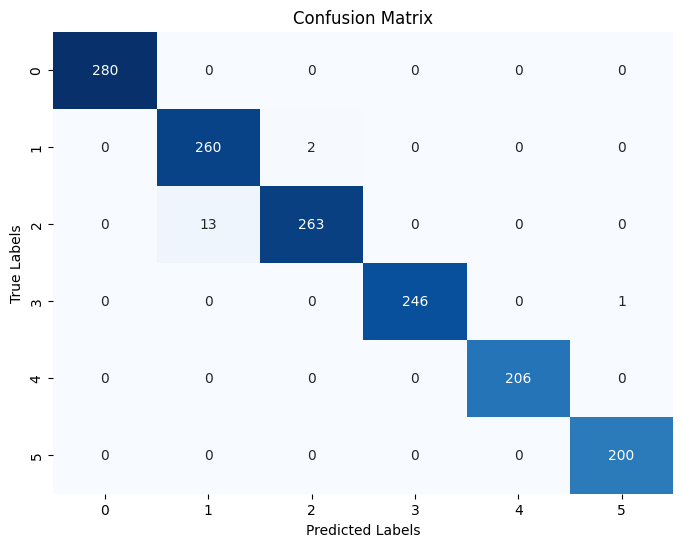

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()